In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

%matplotlib inline


In [3]:
# Sample 1 million data points from a normal distribution
def sample_data(size):
    x1 = np.random.normal(3,2,size=size)
    x2 = np.random.normal(-1,2,size=size)
    theta=np.array([[3,1,2]]).T
    X=np.c_[np.ones(size),x1,x2]
    epsilon=np.random.normal(0,2**0.5,size=size)
    epsilon=np.c_[epsilon]
    Y=np.dot(X,theta)+epsilon
    # Y=np.dot(X,theta)
    return X,Y
X,Y=sample_data(1000000)


In [35]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# Implement stochastic gradient descent
def sgd(theta,X,Y,alpha,max_iter,r,epsilon):
    m=len(Y)
    X,Y=unison_shuffled_copies(X,Y)
    batches=m//r
    converged=False
    iter=0
    # while not converged:
    #     ans+=1
    cost_last=-1
    while not converged:
        iter+=1
        print(iter)
        for b in range(batches):
            X_b=X[b*r:(b+1)*r]
            # print(X_b)
            Y_b=Y[b*r:(b+1)*r]
            H = np.dot(X_b,theta)
            loss=np.dot((H-Y_b).T,(H-Y_b))
            # print(X_b.T.shape,H.shape,Y_b.shape,(H-Y_b).shape)
            grad=np.dot(X_b.T,(H-Y_b))/(2*m)
            theta=theta-alpha*grad
            if(b!=batches-1):
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:b*r].T,(np.dot(X[(b-1)*r:b*r],theta)-Y[(b-1)*r:b*r]))
            else:
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:].T,(np.dot(X[(b-1)*r:],theta)-Y[(b-1)*r:]))
            cost=loss/(2*r)
        if abs(cost_last-cost)<epsilon:
            converged=True
        cost_last=cost
        print(cost)

        if iter>max_iter:
            converged=True 
    return theta
theta=sgd([[0],[0],[0]],X,Y,10,1000,10,1e-10)
print(theta)

1
[[1.70260036]]
2
[[1.69724909]]
3
[[1.69716022]]
4
[[1.6971587]]
5
[[1.69715867]]
6
[[1.69715867]]
7
[[1.69715867]]
[[3.00173203]
 [0.9977089 ]
 [1.99534862]]


In [36]:
print(np.mean(Y))
print(np.var(Y))
print(np.mean((Y-np.dot(X,theta))/Y))

4.0029037962500436
21.953532417034918
1.0313920902658948


In [37]:


def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]
def gradient_descent(X,Y,epsilon,alpha,max_iter):
    m=len(X)
    theta = np.zeros((X.shape[1],1))
    converged=False
    cost_last=-1
    plotTheta=[]
    plotCost=[]
    iter=0
    while not converged:
        iter+=1
        H = np.dot(X,theta)
        grad=np.dot(X.T,(H-Y))/(2*m)
        theta=theta-alpha*grad
        cost=get_cost(X,Y,theta)
        if abs(cost_last-cost)<epsilon or iter>max_iter:
            converged=True
        cost_last=cost
        plotTheta.append(theta)
        plotCost.append(cost)
    # plt.scatter(X[:,1:],Y)
    # plt.plot(X[:,1:],H)
    plt.show()
    return plotTheta,plotCost,iter
plotTheta,plotCost,iter=gradient_descent(X,Y,1e-9,0.1,1000)


In [38]:
print(plotTheta[-1])
print(theta)

[[2.99887599]
 [0.99953679]
 [1.99895782]]
[[3.00173203]
 [0.9977089 ]
 [1.99534862]]


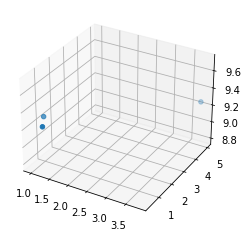

In [47]:
ax=plt.axes(projection='3d')

ax.scatter3D(X[:10000][1],X[:10000][2],Y[:10000][0])
plt.show()


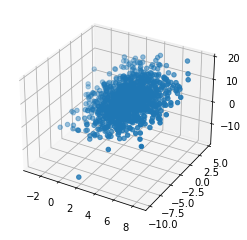

In [44]:
ax=plt.axes(projection='3d')
ax.scatter3D(x1[0:1000],x2[0:1000],Y[0:1000])

In [59]:
a=np.ones(10)
a=np.asmatrix(a)
print(a.T)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [72]:
print(X)
np.random.shuffle(X)
print(X)



[[ 1.          6.52810469 -0.71191286]
 [ 1.          3.821197   -2.70819148]
 [ 1.          4.95747597  0.52207545]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]]
[[ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]
 [ 1.          3.821197   -2.70819148]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          6.52810469 -0.71191286]
 [ 1.          4.95747597  0.52207545]]


In [ ]:
# Notes
# 1. Use np.asmatrix or np.array([[10,20,30]]) or use np.c_[]
# 2. Always check dimensions